<a href="https://colab.research.google.com/github/apoorvminocha/Caltech-UCSD-Birds-classification/blob/master/Birds%20Classification%20-%20Caltech-UCSD-Birds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
nvidia-smi -L

In [1]:
from pathlib import Path
import urllib.request
import tarfile

urlPath = 'http://www.vision.caltech.edu/visipedia-data/CUB-200/images.tgz'

url = urlPath
local_tgz_path = Path("./birdsData.tar.gz")
print("Downloading from %s..." % (url,))
urllib.request.urlretrieve(url, local_tgz_path)

(PosixPath('birdsData.tar.gz'), <http.client.HTTPMessage at 0x7f0d23807fd0>)

In [2]:
print("Opening using tarfile from %s..." % (local_tgz_path,))
tarred_file = tarfile.open(local_tgz_path)
tarred_file.extractall(path="/content")
tarred_file.close()
print("Completed")

Opening using tarfile from birdsData.tar.gz...
Completed


In [0]:
path = Path("/content")

In [0]:
!mkdir train
!cp -r ./images/* ./train


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 32

In [0]:
patt=r"\.((?:.*))\/"

In [0]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()   
        .label_from_re(pat = patt, full_path=False)                  #How to split in train/valid? -> use the folders
        .transform(get_transforms(do_flip=False), size=64)        #Data augmentation? -> use tfms with a size of 64
        .databunch())

In [10]:
data

ImageDataBunch;

Train: LabelList (9653 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Rusty_Blackbird,Rusty_Blackbird,Rusty_Blackbird,Rusty_Blackbird,Rusty_Blackbird
Path: /content;

Valid: LabelList (2413 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Eastern_Towhee,Clay_colored_Sparrow,Western_Gull,Pelagic_Cormorant,Northern_Flicker
Path: /content;

Test: None

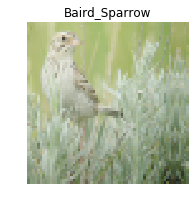

In [11]:
data.show_batch(1, figsize=(3,3), hide_axis=True)


In [12]:
print(data.classes)
len(data.classes),data.c

['Acadian_Flycatcher', 'American_Crow', 'American_Goldfinch', 'American_Pipit', 'American_Redstart', 'American_Three_toed_Woodpecker', 'Anna_Hummingbird', 'Artic_Tern', 'Baird_Sparrow', 'Baltimore_Oriole', 'Bank_Swallow', 'Barn_Swallow', 'Bay_breasted_Warbler', 'Belted_Kingfisher', 'Bewick_Wren', 'Black_Tern', 'Black_and_white_Warbler', 'Black_billed_Cuckoo', 'Black_capped_Vireo', 'Black_footed_Albatross', 'Black_throated_Blue_Warbler', 'Black_throated_Sparrow', 'Blue_Grosbeak', 'Blue_Jay', 'Blue_headed_Vireo', 'Blue_winged_Warbler', 'Boat_tailed_Grackle', 'Bobolink', 'Bohemian_Waxwing', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Brewer_Sparrow', 'Bronzed_Cowbird', 'Brown_Creeper', 'Brown_Pelican', 'Brown_Thrasher', 'Cactus_Wren', 'California_Gull', 'Canada_Warbler', 'Cape_Glossy_Starling', 'Cape_May_Warbler', 'Cardinal', 'Carolina_Wren', 'Caspian_Tern', 'Cedar_Waxwing', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Chipping_Sparrow', 'Chuck_will_Widow', 'Clark_Nutcracker', 'Clay_colore

(200, 200)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 179529185.73it/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.183267,4.260707,0.874430,01:19
1,4.038257,3.385515,0.755491,01:19
2,3.421099,3.016140,0.697472,01:19
3,3.090857,2.947467,0.675922,01:20


In [0]:
learn.save('stage-1')

In [21]:
!mkdir checklist

mkdir: cannot create directory ‘checklist’: File exists


In [22]:
img = open_image('./checklist/test.jpg')
img
learn.predict(img)

(Category Song_Sparrow,
 tensor(167),
 tensor([5.0198e-04, 2.0590e-06, 3.3692e-06, 1.9055e-03, 6.9682e-07, 3.1549e-06,
         2.9981e-05, 1.0048e-05, 1.6407e-02, 3.7673e-06, 2.0861e-05, 1.4163e-04,
         1.8335e-04, 5.9054e-06, 3.2473e-04, 8.7611e-07, 4.4287e-04, 1.3352e-05,
         3.8283e-06, 3.0423e-07, 2.1909e-06, 7.8730e-05, 2.2641e-05, 1.2965e-05,
         3.5714e-06, 1.0485e-05, 4.0443e-07, 3.7980e-05, 1.7500e-06, 1.0261e-07,
         8.8433e-07, 4.5963e-03, 2.6843e-05, 3.6397e-05, 4.2608e-06, 3.5160e-03,
         1.0444e-04, 1.2259e-06, 5.8425e-06, 1.8169e-06, 5.4127e-04, 5.4236e-06,
         1.0585e-03, 2.8935e-07, 2.1435e-04, 3.4161e-05, 3.5747e-06, 7.2405e-03,
         6.9386e-07, 1.5151e-06, 7.3856e-03, 3.5080e-05, 1.7985e-06, 1.6040e-06,
         7.0156e-07, 2.1980e-07, 5.7234e-07, 4.1356e-04, 4.0089e-06, 1.8668e-06,
         2.4985e-06, 5.1039e-05, 1.2146e-05, 3.2145e-03, 5.3044e-07, 9.7052e-06,
         1.3690e-06, 1.1178e-03, 2.2862e-08, 6.2037e-06, 1.6340e-06, 1.

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

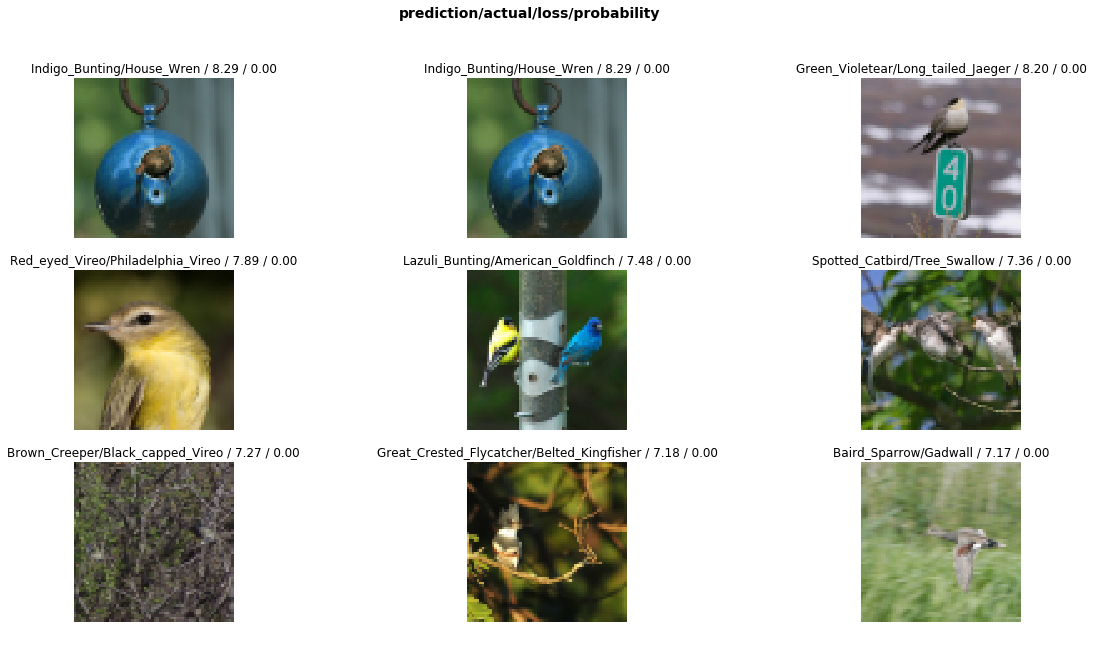

In [24]:
interp.plot_top_losses(9, figsize=(20,10))

In [25]:
interp.most_confused(min_val=4)

[('Glaucous_winged_Gull', 'Western_Gull', 5),
 ('Song_Sparrow', 'Le_Conte_Sparrow', 5),
 ('Bank_Swallow', 'Olive_sided_Flycatcher', 4),
 ('Black_billed_Cuckoo', 'Acadian_Flycatcher', 4),
 ('Blue_Grosbeak', 'Florida_Jay', 4),
 ('Ivory_Gull', 'Herring_Gull', 4),
 ('Kentucky_Warbler', 'Acadian_Flycatcher', 4),
 ('Shiny_Cowbird', 'Groove_billed_Ani', 4),
 ('Western_Wood_Pewee', 'Olive_sided_Flycatcher', 4),
 ('Yellow_breasted_Chat', 'Hooded_Oriole', 4)]